## create fa for TregDRs as test data.

```
cd ~/NGS_original/191103_hPBAT_Fr1-6_STR1.5.6.BDR1_Nova_mergeAll
samtools sort -@ 40 STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.bam \
-o STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.sort.bam
samtools index STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.sort.bam
samtools view -b STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.sort.bam chr12:56022890-56023199 > IKZF4.Treg.bam
samtools fasta -s -n IKZF4.Treg.bam > IKZF4.Treg.fa
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', 100)

from skbio import DNA
from skbio.alignment import local_pairwise_align_ssw

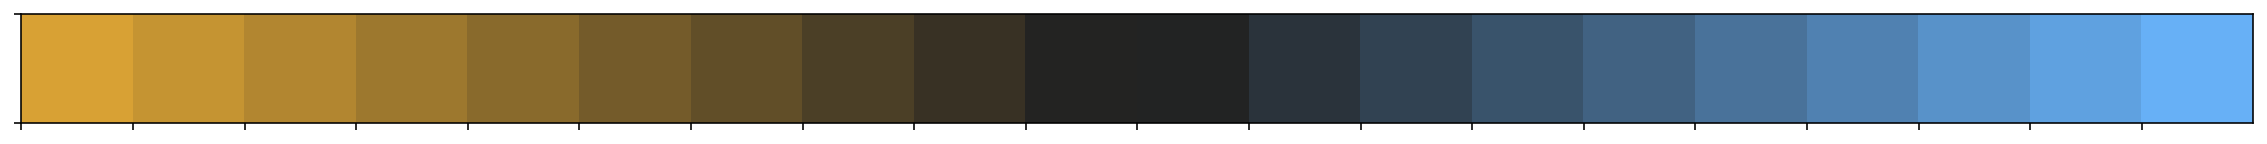

In [54]:
sns.palplot(sns.diverging_palette(55, 245, s=90, l=70, n=20, center="dark"))

In [34]:
from ipywidgets import interact, FloatSlider

def show_pal4(h_neg, h_pos, s, l, center):
    sns.palplot(sns.diverging_palette(h_neg, h_pos, n=24, s=s, l=l, center=center))
interact(show_pal4, h_neg=FloatSlider(220, max=360), h_pos=FloatSlider(20, max=360), 
         s=FloatSlider(75, max=99), l=FloatSlider(50, max=99), center=('light', 'dark'));

ValueError: ('light', 'dark') cannot be transformed to a widget

In [55]:
len('GTTTTTTGATTTTTTTTTTTGGTGTTTTTATTTTTAGCGTAGGGTAGTTTTATTTTTGGGTATTGTATGAGATGTTTAGATGATGTAGGAGATAGTATTTTGTATGGGGATTATACGTAGTTAGGGTGGGGTATTCGGGA')

140

In [ ]:
chr12 56022890 56023199 

In [ ]:
samtools view -b STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.bam chr12:56022890-56023199 | samtools fasta > IKZF4.TregDR.fa

In [58]:
s = "aa"

In [60]:
s += "a " + 't'

In [61]:
s

'aaa t'

In [ ]:
-D 20 -R 3 -N 0 -L 20 -i S,1,0.50b

In [ ]:
bismark --parallel 10 --output_dir ./static/tmp/job_20200613_204637 \
--temp_dir ./static/tmp/job_20200613_204637 --non_directional -N 1 -f \
--genome  ~/reference/bismark/Gencode_v34/fasta ./static/tmp/job_20200613_204637/input.fasta


In [62]:
'''CCCAGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCTACCATGCC
CGGATAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTGTTAGCCAGGATGGTCTCGATCTCCTG
ACCTCGTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCCG
CCCTCAGTGTTTCTAAGTGTACTTTTAAATATATTTTCCTCCACATAGCAAGTCGCTGGCCTCAAGAGGC
AGCCTCAGCCGAATAAGCTGGGACCAGTGA'''.replace('\n', '').replace('C', 'T')

'TTTAGGTTTATGTTATTTTTTTGTTTTAGTTTTTTGAGTAGTTGGGATTATAGGTGTTTGTTATTATGTTTGGATAATTTTTTGTATTTTTAGTAGAGATGGGGTTTTATTGTGTTAGTTAGGATGGTTTTGATTTTTTGATTTTGTGATTTGTTTGTTTTGGTTTTTTAAAGTGTTGGGATTATAGGTGTGAGTTATTGTGTTTGGTTGTTTTTAGTGTTTTTAAGTGTATTTTTAAATATATTTTTTTTTATATAGTAAGTTGTTGGTTTTAAGAGGTAGTTTTAGTTGAATAAGTTGGGATTAGTGA'

In [63]:
'''TCACTGGTCCCAGCTTATTCGGCTGAGGCTGCCTCTTGAGGCCAGCGACTTGCTATGTGGAGGAAAATATATTTAAA
AGTACACTTAGAAACACTGAGGGCGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGC
GGGCGGATCACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGAAACCCCGTCTCTACTAAAAATACAAAAAA
TTATCCGGGCATGGTAGCGGGCGCCTGTAGTCCCAGTAGGGTAGTTTTGCTACTCGGGAGGCTGAGGCAGGAGAATGGCGTGAACCTGGG'''.replace('\n', '').replace('C', 'T')

'TTATTGGTTTTAGTTTATTTGGTTGAGGTTGTTTTTTGAGGTTAGTGATTTGTTATGTGGAGGAAAATATATTTAAAAGTATATTTAGAAATATTGAGGGTGGTTGGGTGTGGTGGTTTATGTTTGTAATTTTAGTATTTTGGGAGGTTGAGGTGGGTGGATTATGAGGTTAGGAGATTGAGATTATTTTGGTTAATATGGTGAAATTTTGTTTTTATTAAAAATATAAAAAATTATTTGGGTATGGTAGTGGGTGTTTGTAGTTTTAGTTATTTGGGAGGTTGAGGTAGGAGAATGGTGTGAATTTGGG'

## plot

In [12]:
threshold_rate_undetected = 0.5

from pybedtools import BedTool
bt_gff3 = BedTool("/home/yyasumizu/reference/gencode.v34.annotation.gff3.gz")


def query_gene(df_bismark, bt_gff3):
    # f_bismark = "data/200522_BSseq_PCR/CpG_context_sample_3.fa_bismark_bt2.txt.gz"
    # f_CpG = "CpG_context_sample_2.fa_bismark_bt2.txt"
    # f_bismark = "data/CpG_context_input.fasta_bismark_bt2.txt.gz"

    # df_bismark = pd.read_csv(f_CpG, sep='\t', skiprows=[0], header=None)
    # df_bismark.columns=['read', 'strand', 'chr', 'pos', 'meth']

    chr_num = list(df_bismark["chr"].unique())

    df_bismark = df_bismark.pivot(index='read', columns='pos', values='meth')

    gene_pos = list(df_bismark.columns)
    bed_ori = "{}\t{}\t{}".format(chr_num[0], gene_pos[0], gene_pos[-1])

    bed = BedTool(bed_ori, from_string=True)


    query = bt_gff3.intersect(bed)
    list_gene = []
    for data in query:
        if data[2]=="gene":
            attr = list(data.attrs.items())
            list_gene.append(attr[3][1])
            print("{} {} {}:{}".format(data[0], data[3], data[4], attr[3][1]))
    
    return '; '.join(list_gene)


f_bismark = '../static/tmp/job_20210527_155131/CpG_context_input.fasta_bismark_bt2.txt.gz'


df_bismark = pd.read_csv(f_bismark, sep='\t', skiprows=[0], header=None)
df_bismark.columns=['read', 'strand', 'chr', 'pos', 'meth']

gene = query_gene(df_bismark, bt_gff3)

df_bismark = df_bismark.pivot(index='read', columns='pos', values='meth')
df_bismark.columns=df_bismark.columns.astype(str)

# methylated CpG : 1, unmethylated CpG : 0
df_bismark = df_bismark.replace('Z', 1).replace('z', 0)

# remove positions with many undetected reads.
df_bismark = df_bismark.loc[:,df_bismark.isna().sum() < (df_bismark.shape[0]) * threshold_rate_undetected]

# sort reads by methylation
sorted_ind = df_bismark.sum(axis=1).sort_values(ascending=False).index
df_bismark = df_bismark.loc[sorted_ind]

df=df_bismark.melt(value_name='methylation')
list_index=list(sorted_ind)
reads_num = list_index*(df_bismark.shape[1])
df["read"]=reads_num

df_0 = df[df.methylation==0.0]
df_1 = df[df.methylation==1.0]
df_N = df[df.isnull().any(axis=1)]

data_2 = {
    "pos":list(df["pos"]), 
    "read":list(reversed(reads_num)),
    "methylation":[0]*len(df.index)
}

df_mat_2 = pd.DataFrame(data_2)


chrX 49260769 49260881:FOXP3


Text(0.5, 1.0, 'FOXP3')

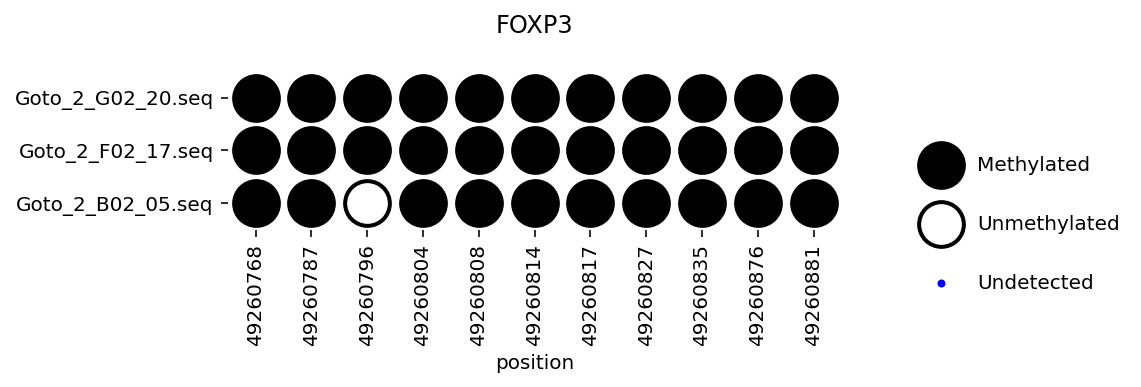

In [13]:
fig, ax = plt.subplots(figsize=(df_bismark.shape[1]/2, df_bismark.shape[0]/2 + .2))
plt.xticks(rotation=90)

ax.scatter(x="pos", y="read", data=df_mat_2, marker="", label=None)
ax.scatter(x="pos", y="read", data=df_1, s=500, linewidths='2', 
        c='#000000', edgecolors='black', label='Methylated')
ax.scatter(x="pos", y="read", data=df_0, s=500, linewidths='2', 
        c='#ffffff', edgecolors='black', label='Unmethylated')
ax.scatter(x="pos", y="read", data=df_N, c='#0000ff', marker=".", label='Undetected')

ax.legend(bbox_to_anchor=(1.1, 0.5), frameon=False, labelspacing=2)
ax.spines["right"].set_color("none") 
ax.spines["left"].set_color("none")  
ax.spines["top"].set_color("none")   
ax.spines["bottom"].set_color("none")

ax.set_xlabel('position')
ax.set_ylim(-0.5,df_bismark.shape[0])
ax.set_title(gene)

In [14]:
df_bismark

pos,49260768,49260787,49260796,49260804,49260808,49260814,49260817,49260827,49260835,49260876,49260881
read,,,,,,,,,,,
Goto_2_G02_20.seq,1,1,1,1,1,1,1,1,1,1,1
Goto_2_F02_17.seq,1,1,1,1,1,1,1,1,1,1,1
Goto_2_B02_05.seq,1,1,0,1,1,1,1,1,1,1,1
